In [2]:
import pandas as pd

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Data dari PaDEL-PubChem

In [22]:
df = pd.read_csv("./dataset/descriptors.csv")
df["Name"] = ["DB00575", "DB00686", "DB00574", "DB00579", "DB01955", "DB01957", "DB03880", "DB03882", "DB04214", "DB04217", "DB01483", "DB05105", "DB05104", "DB05102", "DB05107"]
df.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,DB00575,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DB00686,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DB00574,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DB00579,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DB01955,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


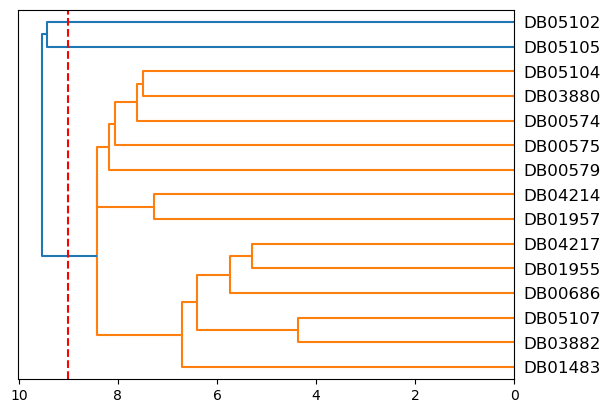

In [40]:
X = df.iloc[:, 1:].values
Z = linkage(X, method='single', metric='euclidean')

fig = plt.figure()

dn = dendrogram(Z, orientation="left", labels=df["Name"].tolist(), color_threshold=9)

_, ymax = plt.ylim()
plt.vlines(9, 0, ymax, colors="r", linestyles="dashed")
plt.show()

In [39]:
clusters = fcluster(Z, 3, criterion='maxclust')
print(clusters)

df["cluster"] = clusters
df_cluster = df[["Name", "cluster"]].copy()
df_cluster

[1 1 1 1 1 1 1 1 1 1 1 2 1 3 1]


,Name,cluster
0,DB00575,1
1,DB00686,1
2,DB00574,1
3,DB00579,1
4,DB01955,1
5,DB01957,1
6,DB03880,1
7,DB03882,1
8,DB04214,1
9,DB04217,1


## Reduksi Dimensi

In [47]:
from sklearn.decomposition import PCA

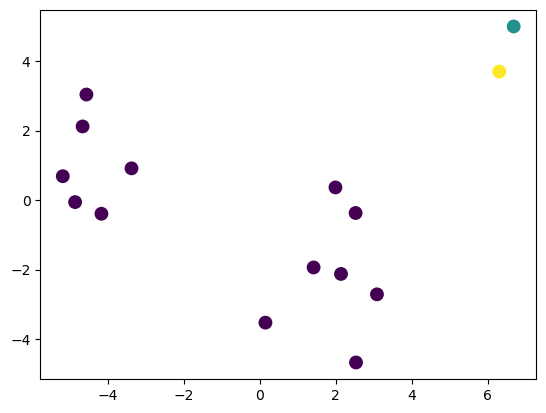

In [52]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.scatter(components[:, 0], components[:, 1], c=clusters, s=80)